Principal Component Analysis is a technique used to reduce the dimensions of a dataset and produce a set of uncorrelated predictors. In the case of the current dataset, since many variables are linearly related, as resulted from the correlation matrix in the exploratory step, a reduced number of components could capture a great proportion of the variance.

In [1]:
# read file with transformed variables
players.trans <- read.csv("/Users/alessia/Desktop/Statistics/players.trans.csv", header = TRUE)

In [2]:
# select continuous variables only
players.continuous <- players.trans[-c(1, 2, 3, 4)]

In [3]:
# covariance and correlation matrices
install.packages('rrcov')
library(rrcov)
(apply(players.continuous, 2, sd))^2 # variance
Sigm <- cov(players.continuous); Sigm # covariance
Rr <- cor(players.continuous); Rr # correlation

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Caricamento del pacchetto richiesto: robustbase

Scalable Robust Estimators with High Breakdown Point (version 1.7-5)




Age           MP          X3P          X2P           FT          ORB 
2.510103e-04 3.132553e+01 4.051892e-01 3.223911e-03 5.725574e-03 6.333794e-01 
         DRB          AST          STL          BLK          TOV           PF 
5.616723e-01 7.818214e-01 2.800273e-01 7.718224e-01 4.421726e-01 3.771594e-01 
      Salary 
5.617950e+13

Age           MP           X3P           X2P           FT           
Age     2.510103e-04 8.452234e-03  3.687508e-04  3.453823e-05  2.111873e-04
MP      8.452234e-03 3.132553e+01  7.436765e-01  3.289079e-02  1.126081e-01
X3P     3.687508e-04 7.436765e-01  4.051892e-01 -6.124248e-03  1.508532e-02
X2P     3.453823e-05 3.289079e-02 -6.124248e-03  3.223911e-03 -6.097070e-04
FT      2.111873e-04 1.126081e-01  1.508532e-02 -6.097070e-04  5.725574e-03
ORB    -5.400201e-04 1.936339e+00 -1.436600e-01  1.986079e-02 -1.233283e-02
DRB     9.664015e-04 3.129296e+00 -8.654547e-03  1.266984e-02  2.564451e-03
AST     1.849134e-03 3.715831e+00  1.218811e-01 -3.987586e-03  1.969382e-02
STL     4.511495e-04 2.301622e+00  5.314520e-02  7.174379e-04  6.583747e-03
BLK     5.290789e-05 2.070932e+00 -8.978884e-02  1.630953e-02 -8.490120e-03
TOV     4.308911e-04 3.004319e+00  4.872497e-02  1.560481e-03  9.607545e-03
PF      5.773440e-05 2.356523e+00 -3.080116e-03  7.992886e-03  6.990410e-04
Salary  4.501018e+04 2.448492e+07  1.951872e+05  4.251067e+04  1.057358e+05
       ORB           DRB           AST           STL          BLK          
Age    -5.400201e-04  9.664015e-04  1.849134e-03 4.511495e-04  5.290789e-05
MP      1.936339e+00  3.129296e+00  3.715831e+00 2.301622e+00  2.070932e+00
X3P    -1.436600e-01 -8.654547e-03  1.218811e-01 5.314520e-02 -8.978884e-02
X2P     1.986079e-02  1.266984e-02 -3.987586e-03 7.174379e-04  1.630953e-02
FT     -1.233283e-02  2.564451e-03  1.969382e-02 6.583747e-03 -8.490120e-03
ORB     6.333794e-01  4.414407e-01  1.017381e-01 1.325911e-01  4.412703e-01
DRB     4.414407e-01  5.616723e-01  3.116462e-01 2.203265e-01  4.122431e-01
AST     1.017381e-01  3.116462e-01  7.818214e-01 3.328663e-01  1.192251e-01
STL     1.325911e-01  2.203265e-01  3.328663e-01 2.800273e-01  1.628568e-01
BLK     4.412703e-01  4.122431e-01  1.192251e-01 1.628568e-01  7.718224e-01
TOV     2.149700e-01  3.345320e-01  4.911591e-01 2.436235e-01  2.175242e-01
PF      2.984226e-01  3.291862e-01  2.503184e-01 1.820292e-01  3.066891e-01
Salary  1.863005e+06  2.943378e+06  3.168206e+06 1.755046e+06  1.905170e+06
       TOV          PF            Salary      
Age    4.308911e-04  5.773440e-05 4.501018e+04
MP     3.004319e+00  2.356523e+00 2.448492e+07
X3P    4.872497e-02 -3.080116e-03 1.951872e+05
X2P    1.560481e-03  7.992886e-03 4.251067e+04
FT     9.607545e-03  6.990410e-04 1.057358e+05
ORB    2.149700e-01  2.984226e-01 1.863005e+06
DRB    3.345320e-01  3.291862e-01 2.943378e+06
AST    4.911591e-01  2.503184e-01 3.168206e+06
STL    2.436235e-01  1.820292e-01 1.755046e+06
BLK    2.175242e-01  3.066891e-01 1.905170e+06
TOV    4.421726e-01  2.701066e-01 2.684227e+06
PF     2.701066e-01  3.771594e-01 1.625734e+06
Salary 2.684227e+06  1.625734e+06 5.617950e+13

Age          MP         X3P          X2P         FT          ORB        
Age     1.000000000 0.09531836  0.036564388  0.03839395  0.17616212 -0.04282844
MP      0.095318361 1.00000000  0.208740117  0.10349839  0.26589551  0.43471052
X3P     0.036564388 0.20874012  1.000000000 -0.16944638  0.31319583 -0.28357955
X2P     0.038393947 0.10349839 -0.169446381  1.00000000 -0.14191233  0.43951423
FT      0.176162123 0.26589551  0.313195832 -0.14191233  1.00000000 -0.20479587
ORB    -0.042828436 0.43471052 -0.283579548  0.43951423 -0.20479587  1.00000000
DRB     0.081389868 0.74602931 -0.018141530  0.29774068  0.04522134  0.74011441
AST     0.131998421 0.75084962  0.216547717 -0.07942639  0.29435182  0.14457660
STL     0.053811426 0.77711388  0.157773811  0.02387770  0.16442331  0.31483453
BLK     0.003801159 0.42117046 -0.160559022  0.32695743 -0.12771609  0.63112304
TOV     0.040900241 0.80723686  0.115113617  0.04133054  0.19094444  0.40620947
PF      0.005933712 0.68558309 -0.007879083  0.22921846  0.01504287  0.61057257
Salary  0.379032120 0.58366080  0.040910375  0.09988896  0.18643343  0.31231522
       DRB         AST         STL        BLK          TOV        PF          
Age     0.08138987  0.13199842 0.05381143  0.003801159 0.04090024  0.005933712
MP      0.74602931  0.75084962 0.77711388  0.421170460 0.80723686  0.685583092
X3P    -0.01814153  0.21654772 0.15777381 -0.160559022 0.11511362 -0.007879083
X2P     0.29774068 -0.07942639 0.02387770  0.326957435 0.04133054  0.229218460
FT      0.04522134  0.29435182 0.16442331 -0.127716091 0.19094444  0.015042868
ORB     0.74011441  0.14457660 0.31483453  0.631123040 0.40620947  0.610572571
DRB     1.00000000  0.47029091 0.55555248  0.626113664 0.67127464  0.715216629
AST     0.47029091  1.00000000 0.71140326  0.153481161 0.83535773  0.460974009
STL     0.55555248  0.71140326 1.00000000  0.350305580 0.69234564  0.560116398
BLK     0.62611366  0.15348116 0.35030558  1.000000000 0.37235137  0.568430265
TOV     0.67127464  0.83535773 0.69234564  0.372351373 1.00000000  0.661419152
PF      0.71521663  0.46097401 0.56011640  0.568430265 0.66141915  1.000000000
Salary  0.52398109  0.47804717 0.44248582  0.289325122 0.53856026  0.353181631
       Salary    
Age    0.37903212
MP     0.58366080
X3P    0.04091038
X2P    0.09988896
FT     0.18643343
ORB    0.31231522
DRB    0.52398109
AST    0.47804717
STL    0.44248582
BLK    0.28932512
TOV    0.53856026
PF     0.35318163
Salary 1.00000000

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

corrplot 0.92 loaded

Warning message in text.default(pos.ylabel[, 1] + 0.5, pos.ylabel[, 2], newcolnames[1:min(n, :
“parametro grafico "numer.cex" non valido”
Warning message in title(title, ...):
“parametro grafico "numer.cex" non valido”
Warning message in title(title, ...):
“parametro grafico "numer.cex" non valido”


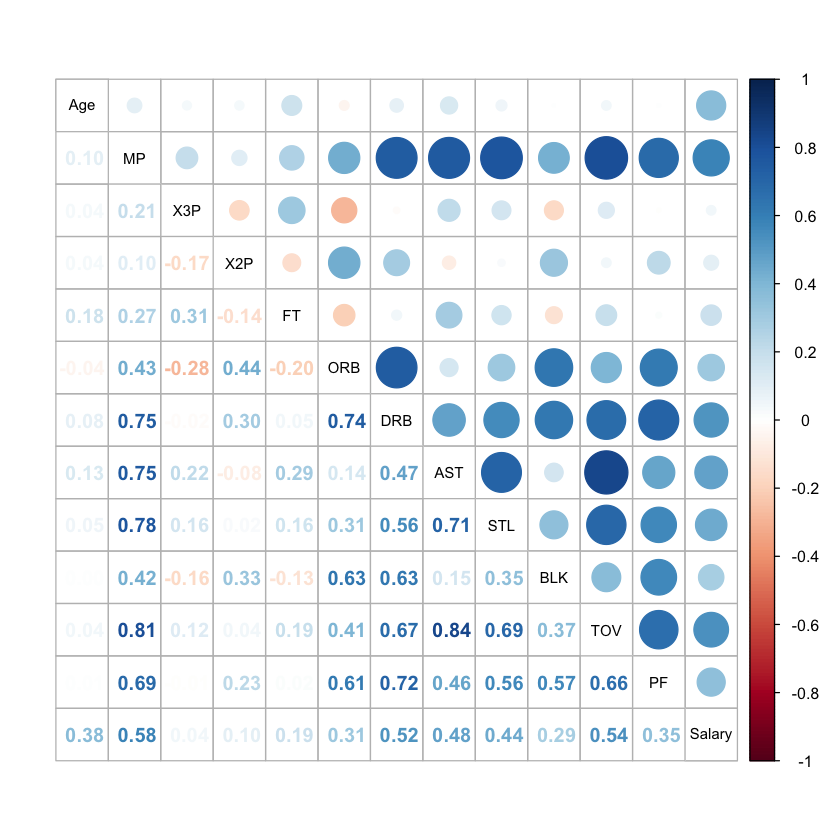

In [4]:
# correlation matrix of transformed variables
install.packages('corrplot')
library(corrplot)
corrplot.mixed(Rr, numer.cex = 0.8, tl.col = 'black', tl.cex = 0.75)

We perform a PCA analysis, in order to obtain k independent components which capture most of the variance in the dataset. Since the variables have very different scales, we run PCA both on the covariance (non-scaled variables) and the correlation matrix (scaled). 

Warning message in .distances(data, r, obj, crit):
“Too small eigenvalue(s):  0.000192406802441742 - the diagonal matrix of the eigenvalues cannot be inverted!”



Call:
PcaClassic(x = players.continuous, scale = F)
Importance of components:
                           PC1   PC2   PC3    PC4    PC5    PC6    PC7    PC8
Standard deviation     7495299 4.655 1.093 0.6293 0.5733 0.5019 0.3602 0.3221
Proportion of Variance       1 0.000 0.000 0.0000 0.0000 0.0000 0.0000 0.0000
Cumulative Proportion        1 1.000 1.000 1.0000 1.0000 1.0000 1.0000 1.0000
                          PC9   PC10    PC11   PC12    PC13
Standard deviation     0.2945 0.2383 0.06616 0.0498 0.01387
Proportion of Variance 0.0000 0.0000 0.00000 0.0000 0.00000
Cumulative Proportion  1.0000 1.0000 1.00000 1.0000 1.00000

PC1          PC2           PC3           PC4           PC5          
Age    8.011851e-10 -5.359581e-04 -1.474803e-03 -5.971790e-04  7.949420e-04
MP     4.358337e-07  9.757228e-01 -8.316185e-02 -1.504264e-01 -1.008627e-01
X3P    3.474349e-09  3.033934e-02 -2.955751e-01 -3.408276e-01  6.949290e-01
X2P    7.566937e-10  7.591449e-04  2.235149e-02 -7.569500e-03 -6.885505e-03
FT     1.882107e-09  3.020644e-03 -2.603289e-02 -7.665160e-03  1.243109e-02
ORB    3.316165e-08  5.603699e-02  5.642956e-01  7.913325e-02 -2.415346e-01
DRB    5.239239e-08  8.944620e-02  3.277794e-01  5.414144e-02  1.618864e-02
AST    5.639435e-08  1.117872e-01 -2.350274e-01  7.579332e-01  2.306503e-01
STL    3.123997e-08  7.337565e-02 -1.864229e-02  1.831670e-01  1.041634e-01
BLK    3.391219e-08  6.185858e-02  6.082772e-01 -5.169026e-02  5.981765e-01
TOV    4.777947e-08  8.841872e-02  9.892893e-03  4.701970e-01  1.382791e-01
PF     2.893821e-08  7.980584e-02  2.301882e-01  1.418754e-01  8.432614e-02
Salary 1.000000e+00 -4.491369e-07 -1.250651e-08 -1.197883e-08  3.093583e-09
       PC6           PC7           PC8           PC9           PC10         
Age    -1.225046e-03 -6.507583e-05 -1.916114e-03  3.291775e-03 -1.235565e-02
MP     -7.279011e-02 -1.537292e-02 -1.568784e-02 -4.932069e-02 -2.071906e-03
X3P     5.398696e-01 -5.625791e-02  9.648490e-02 -9.146375e-02  7.152666e-03
X2P     1.094831e-02 -7.403014e-03  4.798896e-03 -1.027901e-02 -1.788130e-02
FT     -1.171755e-04 -3.645031e-03 -2.517214e-02  1.396282e-03 -1.412403e-02
ORB     5.104177e-01 -2.752820e-01  3.658361e-01 -3.751500e-01 -3.842475e-02
DRB     3.719204e-01 -1.838599e-01 -4.834738e-01  6.848803e-01 -7.974494e-02
AST     1.398806e-02 -2.265022e-01 -1.007883e-02 -1.004966e-01 -4.926851e-01
STL    -7.347788e-02 -1.531903e-02  7.496495e-01  5.742054e-01  2.280918e-01
BLK    -4.938293e-01 -1.057026e-01 -3.282112e-02 -9.506757e-02 -2.113634e-02
TOV     1.331801e-01  1.091293e-01 -2.369554e-01 -1.739788e-01  7.970891e-01
PF      1.925386e-01  9.012912e-01  5.385347e-02  1.292181e-02 -2.467279e-01
Salary -2.520492e-10  1.121040e-08  7.771536e-09 -2.734098e-09 -3.188352e-09
       PC11          PC12          PC13         
Age     2.256110e-02  1.991419e-02  9.994610e-01
MP     -5.412295e-03 -6.143495e-04  5.418029e-04
X3P    -1.655420e-02  8.170633e-04  4.138488e-04
X2P    -2.283562e-02  9.989342e-01 -1.951894e-02
FT      9.985931e-01  2.283756e-02 -2.327565e-02
ORB     2.710317e-02 -2.699386e-02  3.097776e-03
DRB    -6.375419e-03 -4.579714e-03 -2.938242e-03
AST    -1.156637e-02  4.974511e-04 -5.542928e-03
STL     2.046556e-02  1.004936e-02  1.650921e-03
BLK     6.530144e-03 -6.350894e-03 -2.200572e-04
TOV     7.664451e-03  1.756066e-02  9.853003e-03
PF      6.983519e-03 -3.414913e-03 -2.384198e-03
Salary -8.054535e-10 -2.816466e-10 -1.061835e-09

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“parametro grafico "cl.lim" non valido”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“parametro grafico "cl.lim" non valido”
Warning message in title(title, ...):
“parametro grafico "cl.lim" non valido”


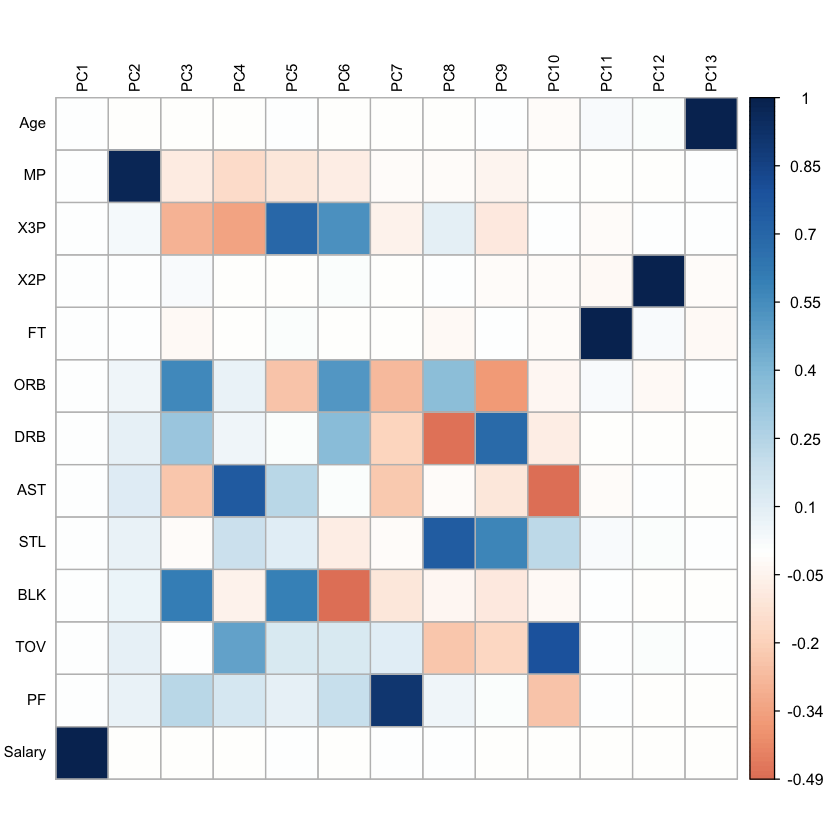

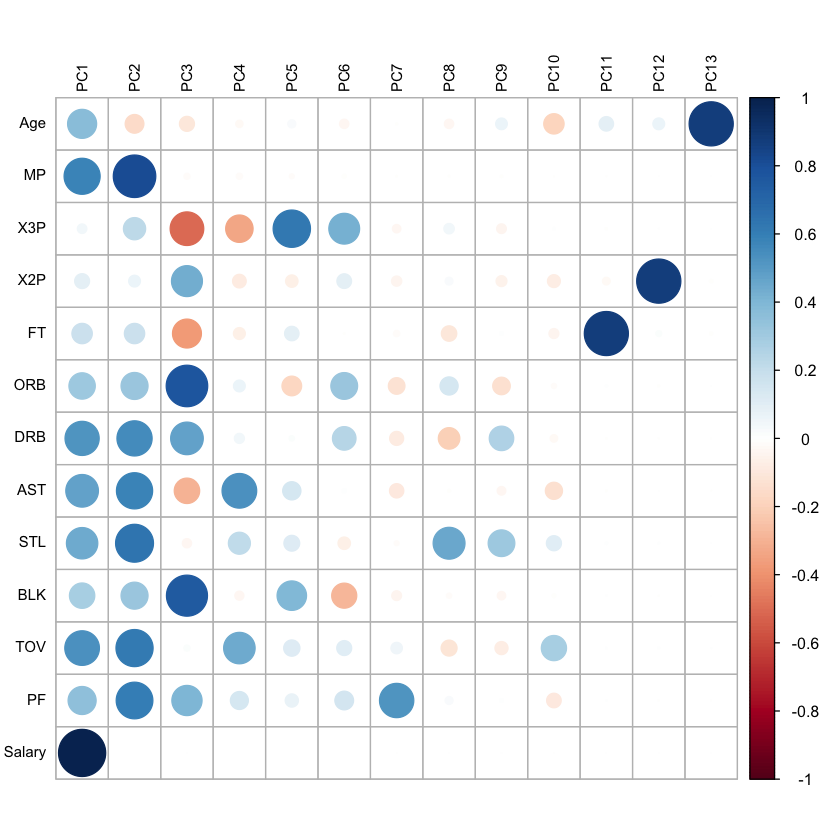

In [5]:
# PCA analysis
players.pca <- PcaClassic(players.continuous, scale = F) # without scaling
summary(players.pca)
players.pca$loadings
corrplot(players.pca$loadings, is.corr = F, cl.lim = c(-1,1), method = 'color', tl.col = 'black', tl.cex = 0.75, addgrid.col = 'grey')
corrplot(cor(players.continuous, players.pca$scores), tl.col = 'black', tl.cex = 0.75)


Call:
PcaClassic(x = players.continuous, scale = T)
Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3426 1.5092 1.09743 0.93122 0.81288 0.78767 0.69228
Proportion of Variance 0.4221 0.1752 0.09264 0.06671 0.05083 0.04773 0.03687
Cumulative Proportion  0.4221 0.5973 0.68999 0.75669 0.80752 0.85525 0.89211
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.63499 0.56516 0.53084 0.42187 0.34572 0.31725
Proportion of Variance 0.03102 0.02457 0.02168 0.01369 0.00919 0.00774
Cumulative Proportion  0.92313 0.94770 0.96937 0.98306 0.99226 1.00000

PC1        PC2        PC3         PC4         PC5           PC6        
Age    0.05715630  0.1466858  0.79261843 -0.11774523 -0.2530652752 -0.09603123
MP     0.38890598  0.1427895 -0.06835523  0.03984762 -0.0001098684  0.04207098
X3P    0.03000603  0.4050775 -0.13382117  0.62464179 -0.5951513980 -0.12420136
X2P    0.10014081 -0.3750235  0.24769706  0.53539551  0.0722704025  0.67962527
FT     0.06962166  0.4139808  0.16756079  0.40764427  0.7429116574 -0.24125775
ORB    0.27380224 -0.4132723  0.01447870  0.05408968  0.0618372948 -0.13169841
DRB    0.37240488 -0.1570089  0.02886561  0.09053485 -0.0020632765 -0.16826863
AST    0.31548263  0.3167757 -0.10503822 -0.20293260  0.0343994613  0.32244377
STL    0.33589338  0.1606224 -0.16372752 -0.11438074 -0.0860002428  0.16686196
BLK    0.26088549 -0.3328228  0.01106135  0.11942793 -0.0670667182 -0.47455351
TOV    0.37219624  0.1416309 -0.14012562 -0.15397753  0.0527534619  0.15539406
PF     0.34555857 -0.1328540 -0.13739897  0.06381139 -0.0247753933 -0.16244572
Salary 0.27874873  0.1091385  0.42687988 -0.18471008 -0.0656495301  0.01666070
       PC7         PC8          PC9         PC10         PC11       
Age    -0.46338587 -0.138381375  0.03639864 -0.124939054 -0.00991638
MP      0.02458781  0.006972321  0.15885865  0.049338229  0.46971210
X3P     0.13661763 -0.075601107 -0.02420470 -0.076185124 -0.16108773
X2P    -0.05983197  0.122012239 -0.09430265  0.064925198  0.03411100
FT     -0.03812339  0.028592800  0.05168532 -0.001002995 -0.10935512
ORB     0.14505613 -0.331073973  0.31776364 -0.344036229 -0.55793222
DRB     0.14908260 -0.234301734  0.15151790 -0.303010080  0.57413582
AST    -0.13656012  0.005259409 -0.31080086 -0.301687767 -0.12439141
STL    -0.25081113  0.448523866  0.63001119  0.094267229 -0.18199642
BLK    -0.13988543  0.629864765 -0.37729311 -0.108463266 -0.03423952
TOV     0.01050412 -0.157228540 -0.42777006 -0.160599630 -0.15763741
PF     -0.32664706 -0.382157686 -0.12896722  0.707995274 -0.08477525
Salary  0.71398387  0.161797367 -0.04331630  0.350776036 -0.13219640
       PC12        PC13        
Age     0.01996695  0.092395826
MP      0.71431219  0.247261363
X3P    -0.02130869 -0.011042802
X2P    -0.03570487  0.014141507
FT     -0.04969221 -0.005293212
ORB     0.26178899 -0.011266337
DRB    -0.48783398 -0.199511399
AST     0.14269920 -0.632953881
STL    -0.28037205  0.068088151
BLK     0.06890043 -0.027419388
TOV    -0.26421793  0.665480928
PF     -0.05630817 -0.178874780
Salary -0.04410445 -0.095727067

Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“parametro grafico "cl.lim" non valido”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“parametro grafico "cl.lim" non valido”
Warning message in title(title, ...):
“parametro grafico "cl.lim" non valido”


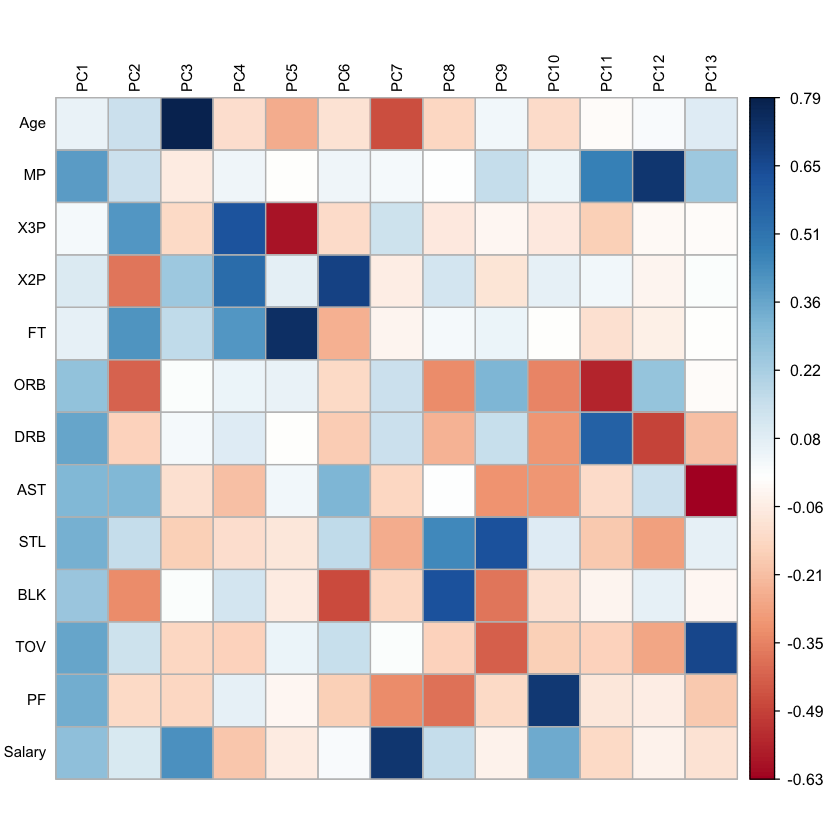

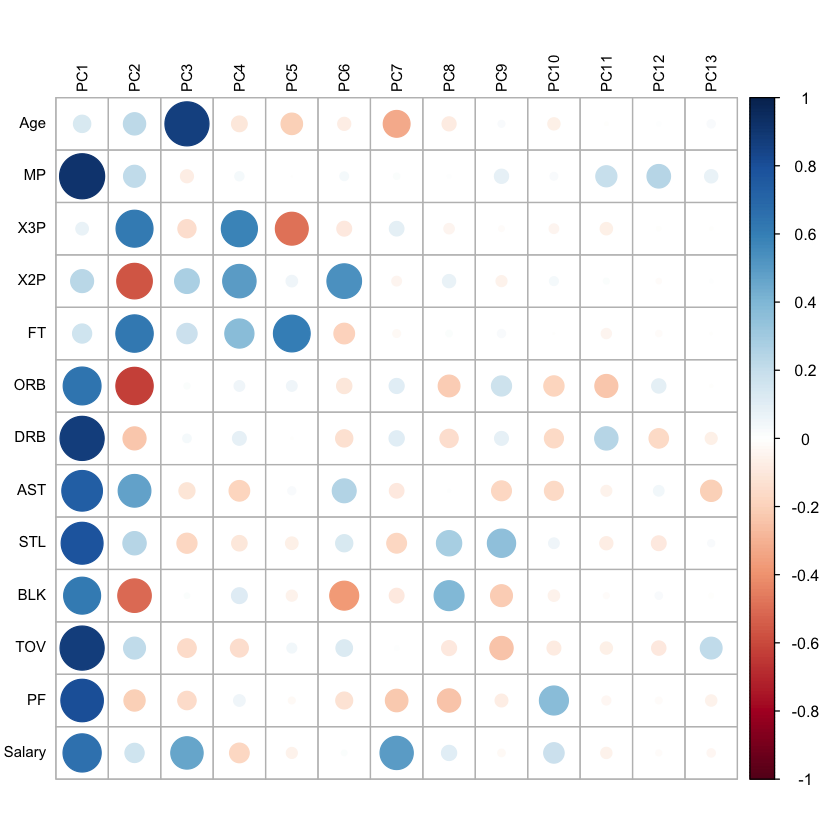

In [6]:
players.pca <- PcaClassic(players.continuous, scale = T) # with scaling
summary(players.pca)
players.pca$loadings
corrplot(players.pca$loadings, is.corr = F, cl.lim = c(-1,1), method = 'color', tl.col = 'black', tl.cex = 0.75, addgrid.col = 'grey')
corrplot(cor(players.continuous, players.pca$scores), tl.col = 'black', tl.cex = 0.75)

Since the variables have very different scales, it makes sense to use the correlation matrix instead of the covariance matrix, otherwise the first Principal Component just captures the variance of the variable Salary, as shown by the loading vectors.
When using the correlation matrix, the variables which contribute to the first eigenvector the most are MP, DRB and TOV, all of which also have a strong influence on the linear regression fit.
Furthermore, the third loading vector shows that the weights assigned to the variable Age inside the third PC are much more significant than the weights assigned to all the other variables inside the same component. Therefore, we expect the variables MP, DRB, TOV and Age to be significant in a linear regression setting.

We select the number of principal components based on a scree plot, which plots the proportion of variance explained by the number of principal components.


Call:
PcaClassic(x = players.continuous, scale = TRUE)
Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3426 1.5092 1.09743 0.93122 0.81288 0.78767 0.69228
Proportion of Variance 0.4221 0.1752 0.09264 0.06671 0.05083 0.04773 0.03687
Cumulative Proportion  0.4221 0.5973 0.68999 0.75669 0.80752 0.85525 0.89211
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.63499 0.56516 0.53084 0.42187 0.34572 0.31725
Proportion of Variance 0.03102 0.02457 0.02168 0.01369 0.00919 0.00774
Cumulative Proportion  0.92313 0.94770 0.96937 0.98306 0.99226 1.00000

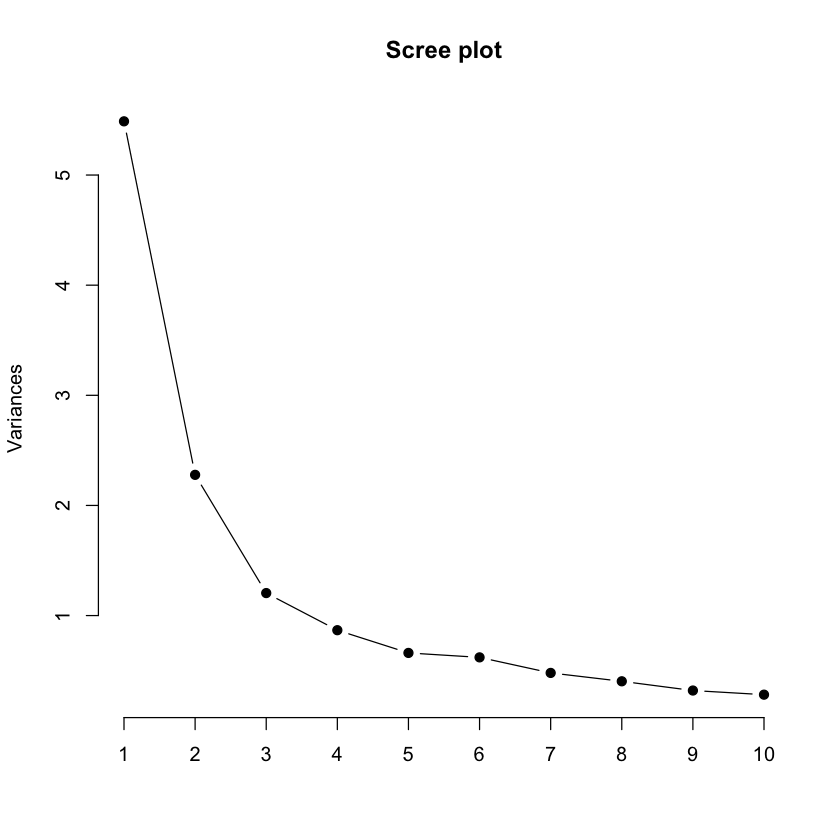

In [7]:
# scree plot to choose the number of components
players.pca <- PcaClassic(players.continuous, scale = TRUE) # we need to scale the data -> correlation matrix
summary(players.pca)
screeplot(players.pca, type = 'lines', pch = 19, main = 'Scree plot')

An "elbow" is present at 3, whereas a minor elbow is present at 5. We choose five PCs, to explain at least 80% of the variance.

In [8]:
# select 5 PCs
players.pca.5 <- PcaClassic(players.continuous, scale = T, k = 5)
summary(players.pca.5)


Call:
PcaClassic(x = players.continuous, k = 5, scale = T)
Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     2.3426 1.5092 1.09743 0.93122 0.81288
Proportion of Variance 0.4221 0.1752 0.09264 0.06671 0.05083
Cumulative Proportion  0.4221 0.5973 0.68999 0.75669 0.80752

By plotting on scatterplots the groups determined by the principal components, we can visualize whether the categorical variables separate the groups.

In [9]:
# scatterplots of scores
# create temporary dataframe
players.temp <- players.trans[-c(1)]
players.temp$Pos1 <- as.numeric(as.factor(players.trans$Pos1))
players.temp$Role <- as.numeric(as.factor(players.trans$Role))
players.temp$Play <- as.numeric(as.factor(players.trans$Play))


Call:
PcaClassic(x = players.continuous, scale = TRUE)
Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3426 1.5092 1.09743 0.93122 0.81288 0.78767 0.69228
Proportion of Variance 0.4221 0.1752 0.09264 0.06671 0.05083 0.04773 0.03687
Cumulative Proportion  0.4221 0.5973 0.68999 0.75669 0.80752 0.85525 0.89211
                           PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.63499 0.56516 0.53084 0.42187 0.34572 0.31725
Proportion of Variance 0.03102 0.02457 0.02168 0.01369 0.00919 0.00774
Cumulative Proportion  0.92313 0.94770 0.96937 0.98306 0.99226 1.00000

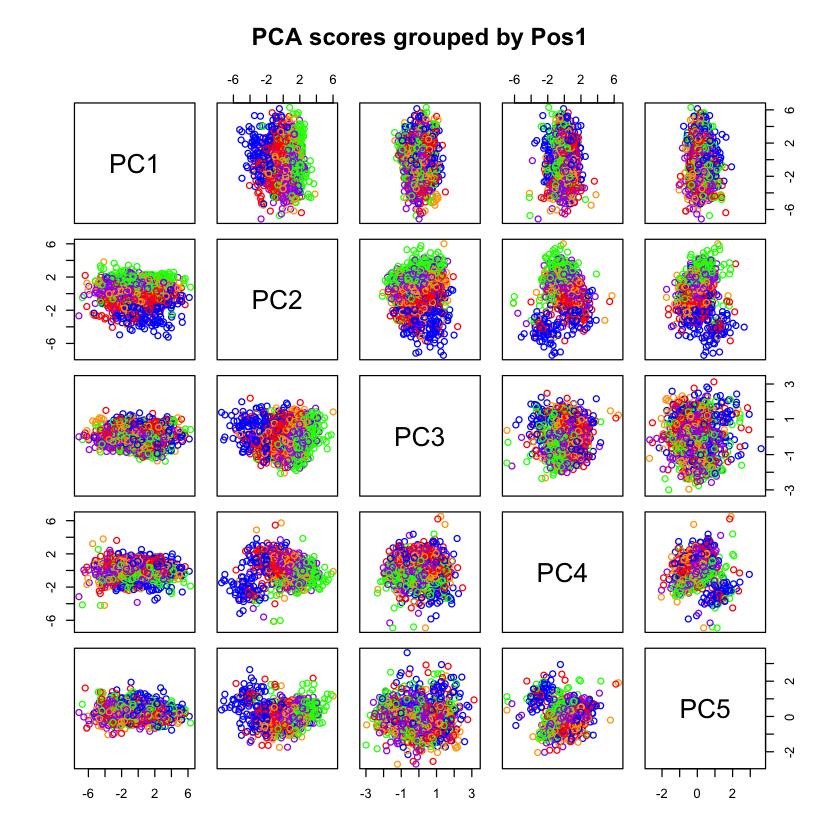

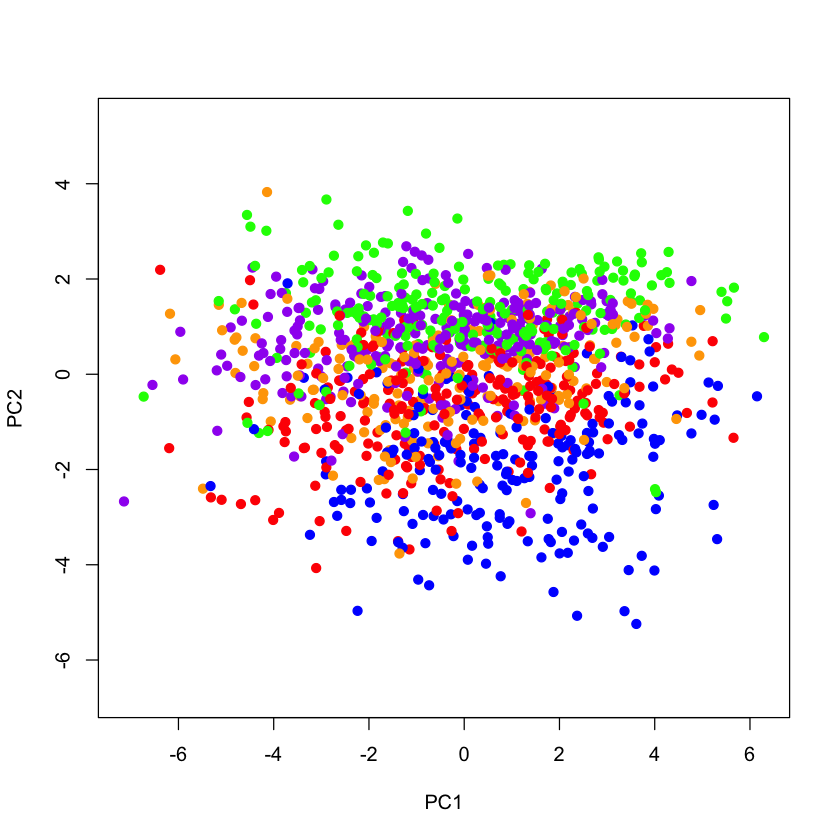

In [10]:
# Pos1 on pca
colors <- c('blue', 'red', 'green', 'orange', 'purple')
par(pty="s")
pairs(players.pca.5$scores,asp=1, col = colors[unclass(players.temp[,'Pos1'])], main = 'PCA scores grouped by Pos1')
par(pty="m")
summary(players.pca)
plot(players.pca.5$scores[,1:2], pch = 19, asp = 1, col = colors[unclass(players.temp[,'Pos1'])]) # zoom in on first 2 PCAs
# can't determine the groups made by Pos1

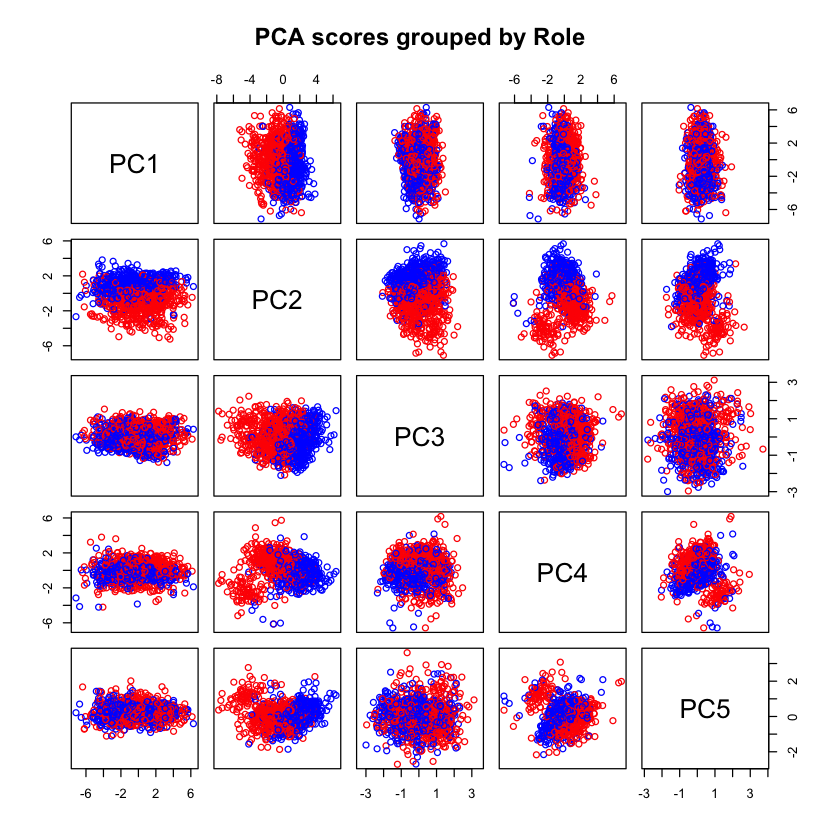

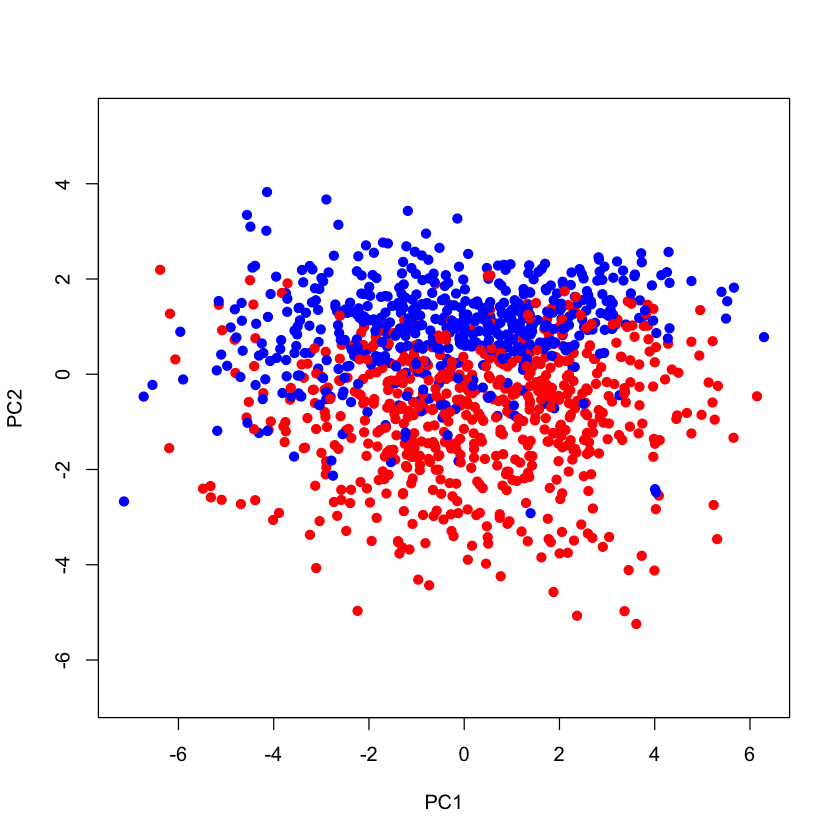

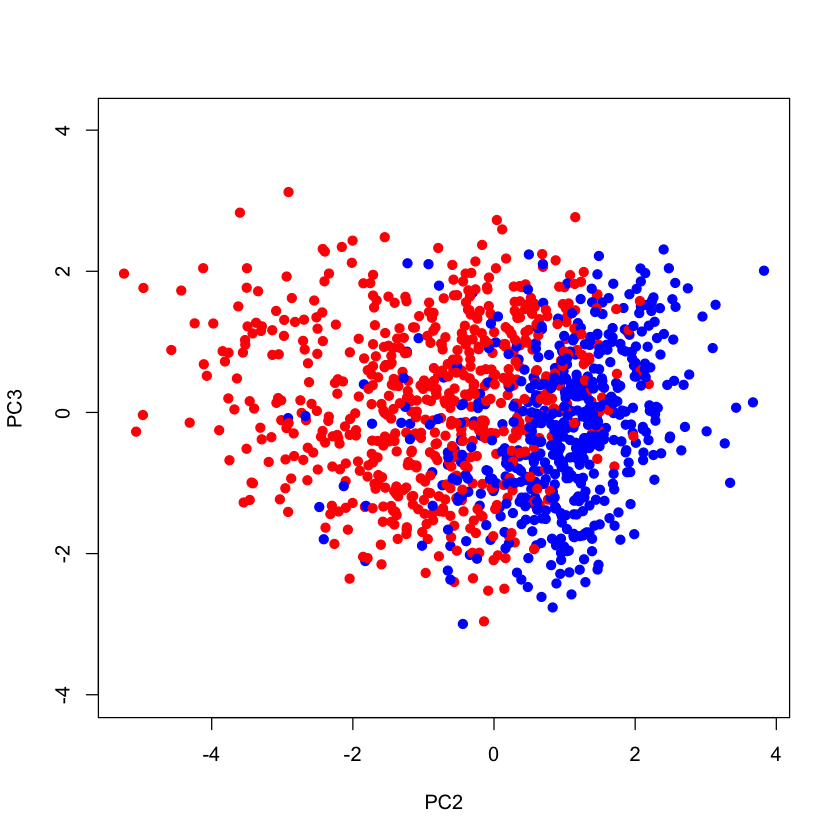

In [11]:
# Role on pca
pairs(players.pca.5$scores,asp=1, col = colors[unclass(players.temp[,'Role'])], main = 'PCA scores grouped by Role')
plot(players.pca.5$scores[,1:2], pch = 19, asp = 1, col = colors[unclass(players.temp[,'Role'])])
# can partially view the groups determined by Role
plot(players.pca.5$scores[,2:3], pch = 19, asp = 1, col = colors[unclass(players.temp[,'Role'])])

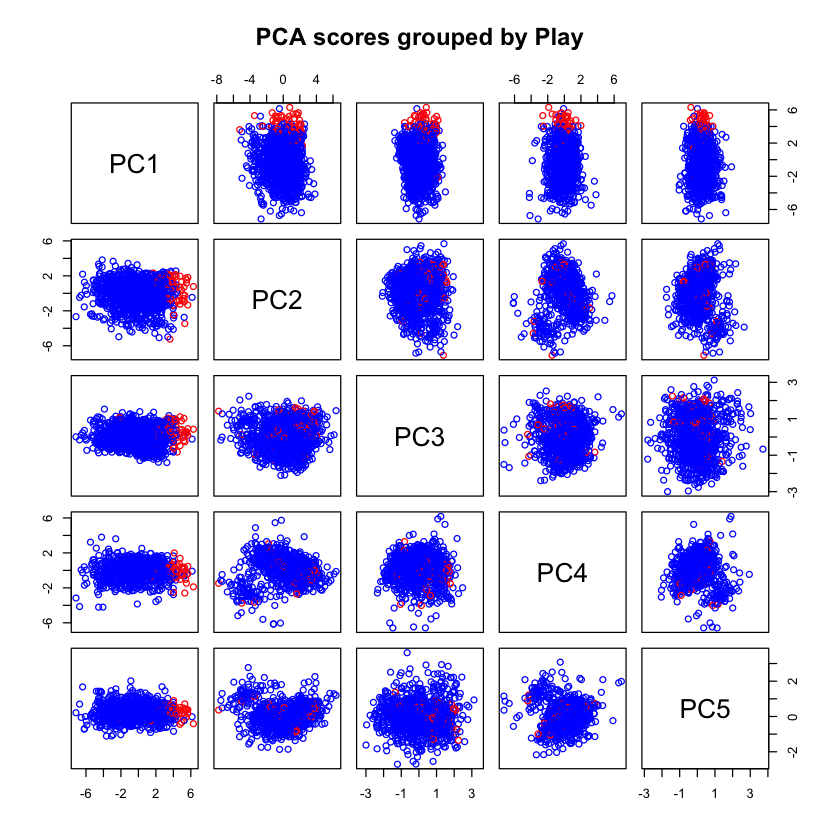

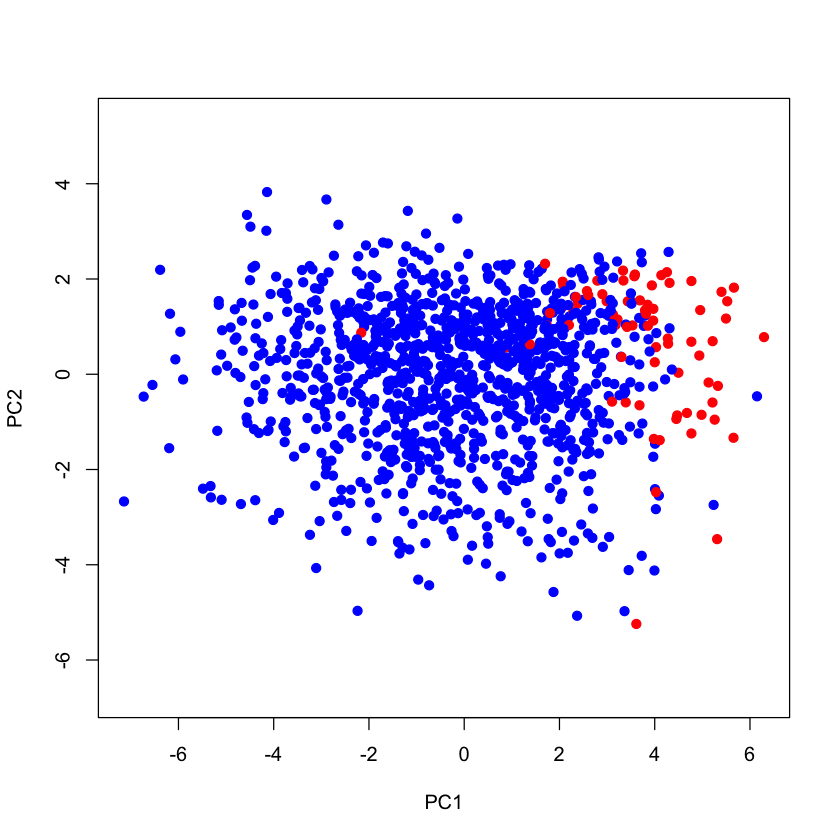

In [12]:
# Play on pca
pairs(players.pca.5$scores,asp=1, col = colors[unclass(players.temp[,'Play'])], main = 'PCA scores grouped by Play')
plot(players.pca.5$scores[,1:2], pch = 19, asp = 1, col = colors[unclass(players.temp[,'Play'])])
# can determine the groups made by Play

Consistently with what was found out by the boxplots in the exploratory analysis, we can partially determine two groups based on the categorical variable Role, we can more easily distinguish the groups based on the variable Play, whereas we can't visualize the groups determined by the variable Pos1.

Through biplots, we can determine which variables contribute to the first two principal components, consistently with what was previously found through the loading vectors.

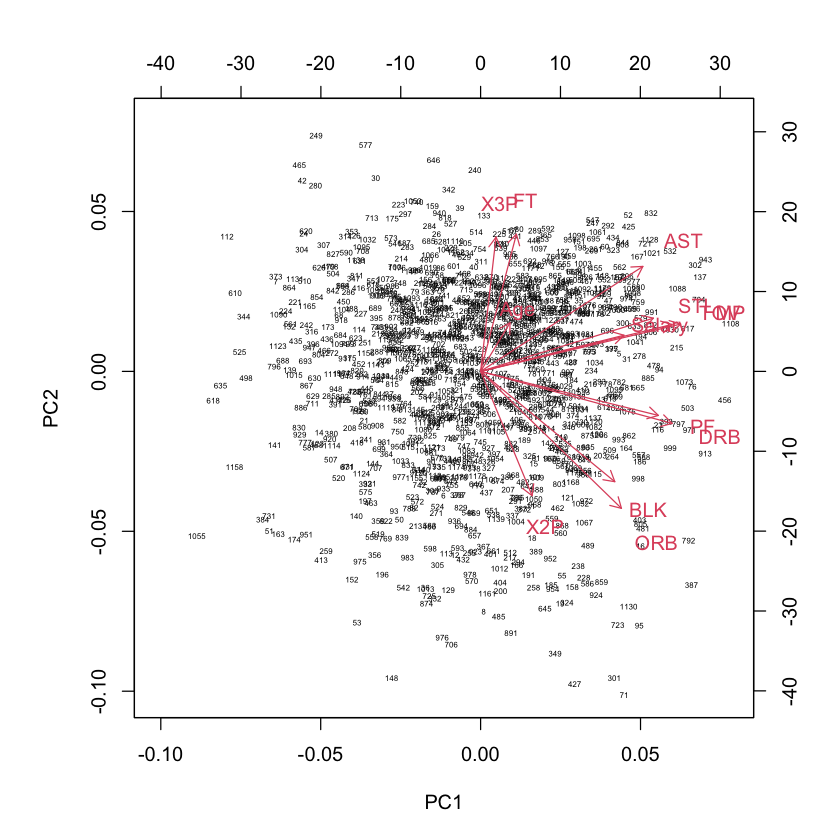

In [13]:
# biplot of components
biplot(players.pca.5, scale = T, cex = c(0.4, 1))

By coloring scores according to categorical variables, we can visualize whether the latter clearly separate the instances projected into the reduced dimensional space in two groups.

Aggiornamento indice HTML dei pacchetti in '.Library'

Making 'packages.html' ...
 fatto

Caricamento del pacchetto richiesto: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


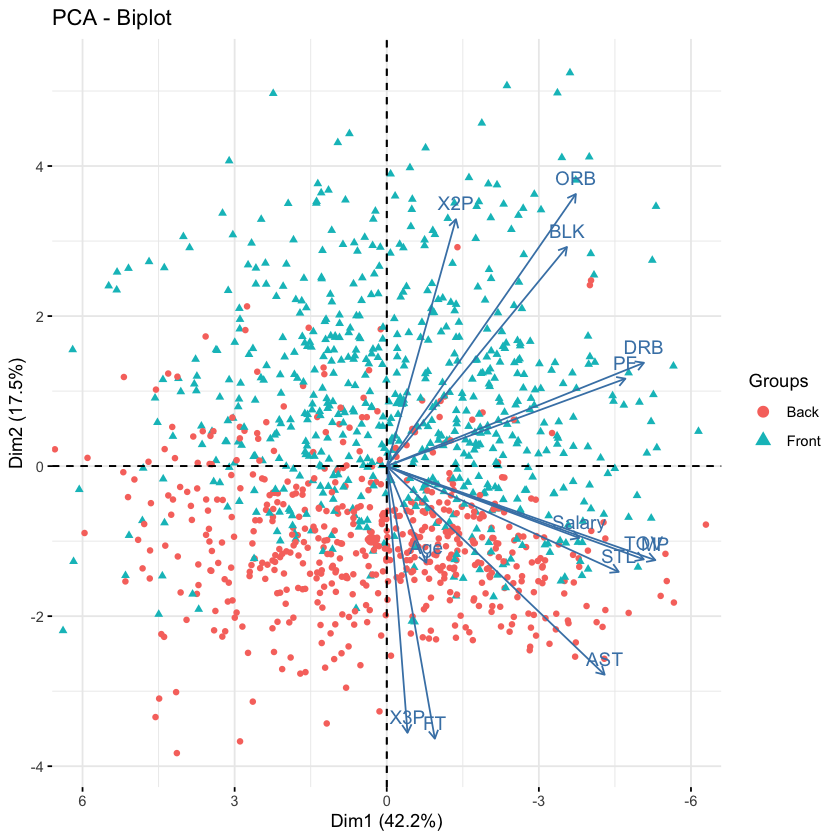

In [14]:
# biplot of components and scores based on the categorical variable Role
install.packages('factoextra')
library(factoextra)
players.pca <- prcomp(players.continuous, scale = T)
fviz_pca_biplot(players.pca,
                label="var",
                habillage = players.trans$Role,
               xlim=c(6, -6))

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


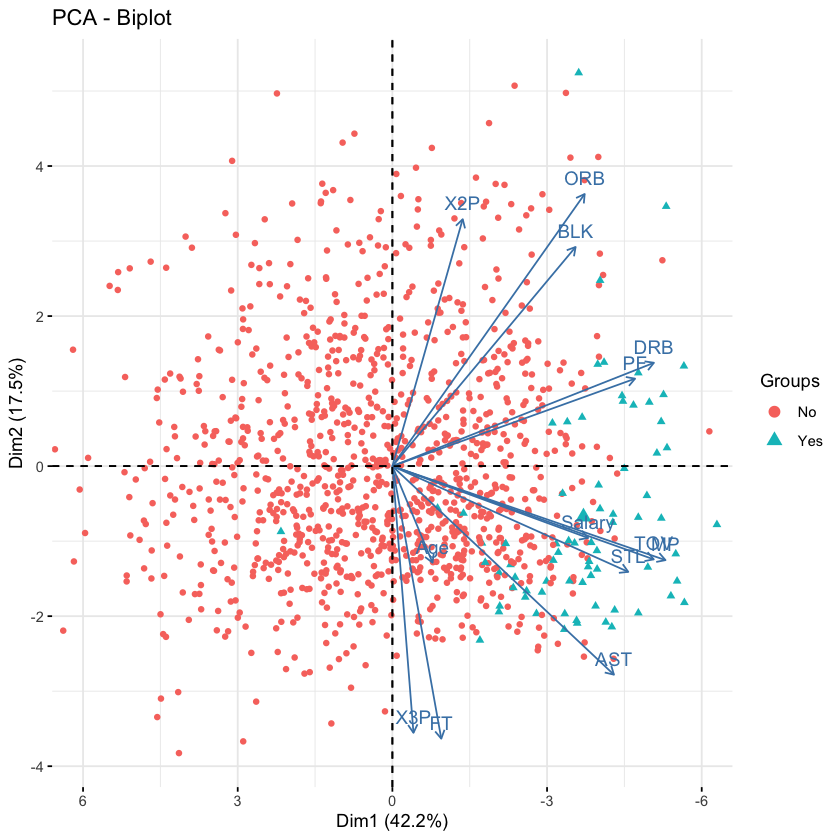

In [15]:
# biplot of components and scores based on the categorical variable Play
players.pca <- prcomp(players.continuous, scale = TRUE)
fviz_pca_biplot(players.pca,
                label="var",
                habillage = players.trans$Play,
               xlim = c(6, -6))

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


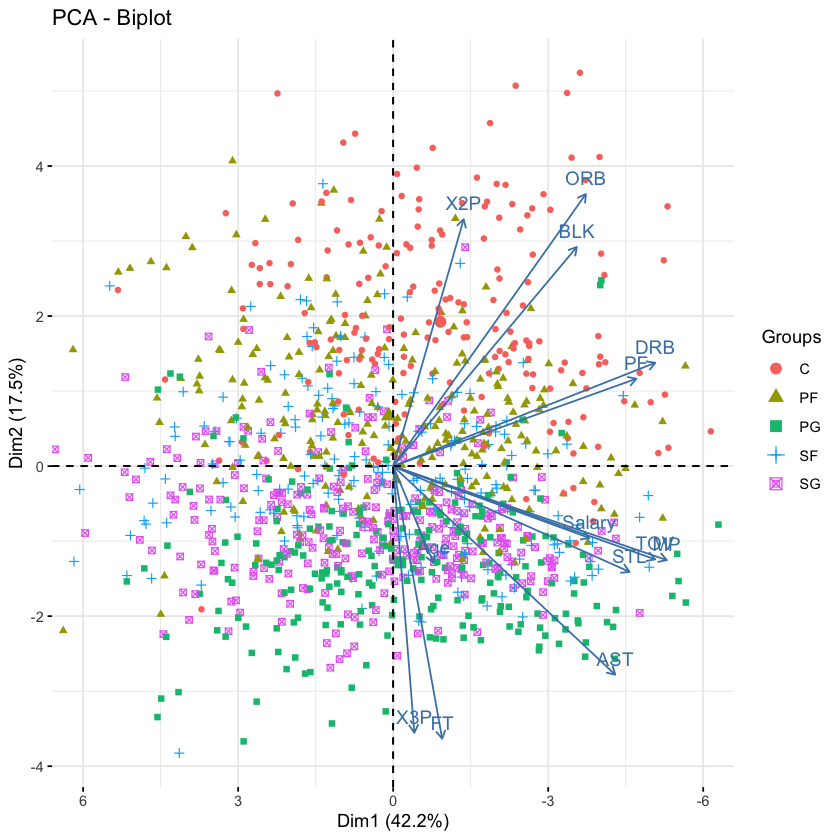

In [16]:
# biplot of components and scores based on the categorical variable Pos1
players.pca <- prcomp(players.continuous, scale = TRUE)
fviz_pca_biplot(players.pca,
                label="var",
                habillage = players.trans$Pos1,
               xlim = c(6, -6))

We now investigate PCA outliers (bad leverage points and orthogonal outliers) through classical PCA and robust PCA.

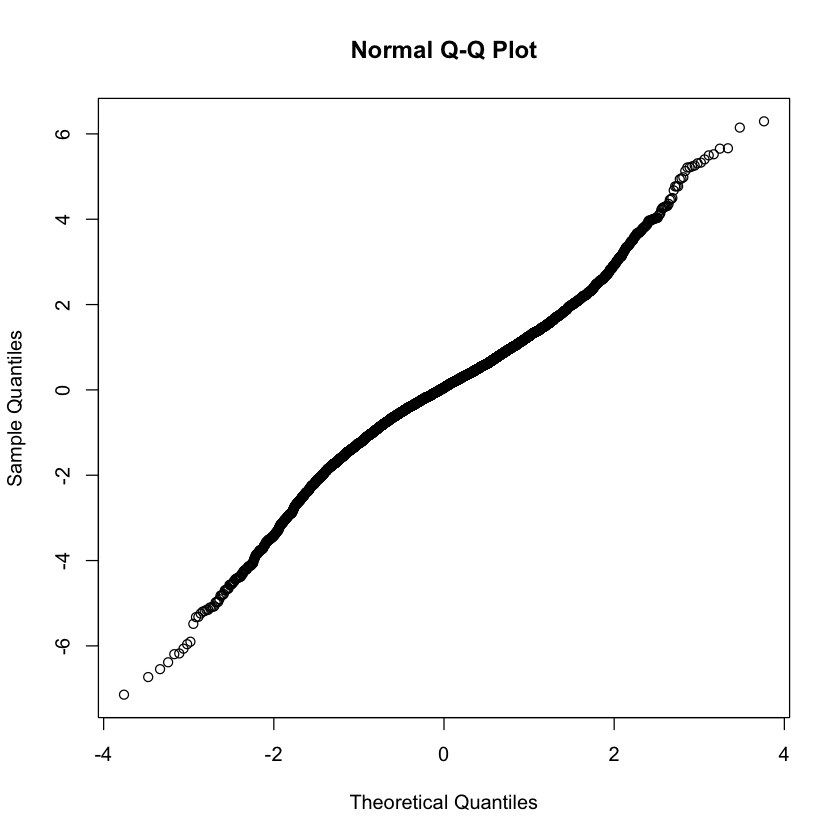

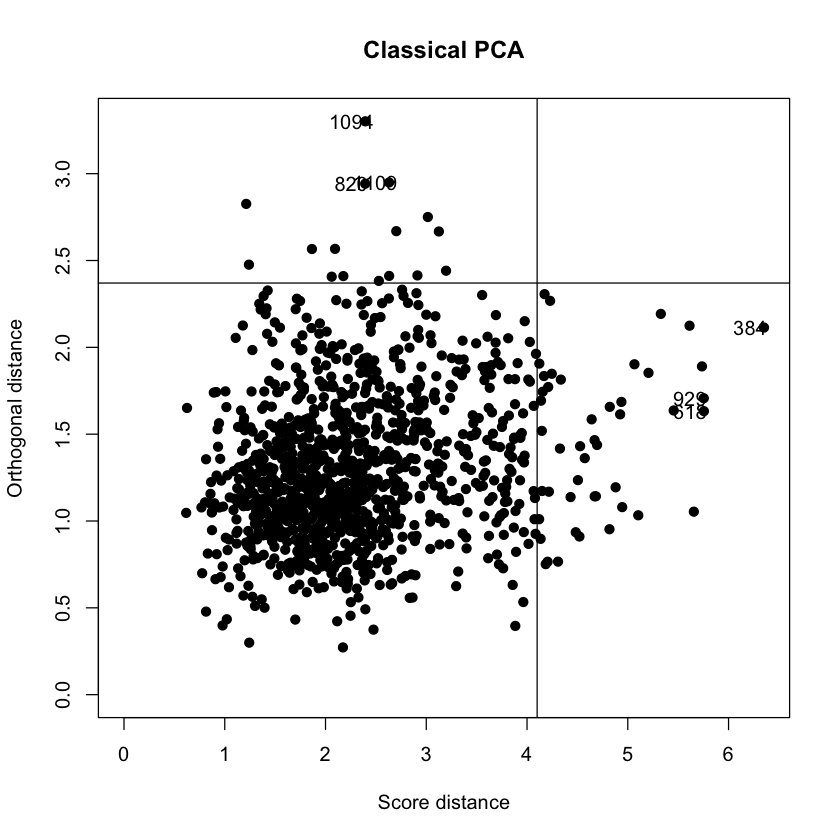

In [17]:
# check if scores are approximately normal-distributed
qqnorm(players.pca.5$scores)
players.pca.5 <- PcaClassic(players.continuous, scale = T, k = 6, crit.pca.distances = 0.99)
plot(players.pca.5, pch = 19)

In [18]:
# Create a vector based on the condition
list_od <- as.vector(which(players.pca.5$od > players.pca.5$cutoff.od))
length(list_od)
list_sd <- as.vector(which(players.pca.5$sd > players.pca.5$cutoff.sd))
list_blp <- as.vector(which(players.pca.5$od > players.pca.5$cutoff.od & players.pca.5$sd > players.pca.5$cutoff.sd))
# There are some mild outliers:
# some orthogonal outliers are present
# there is no bad Pca leverage point
# good PCA leverage points are also present (outlying score distance, but regular orthogonal distance)

[1] 16

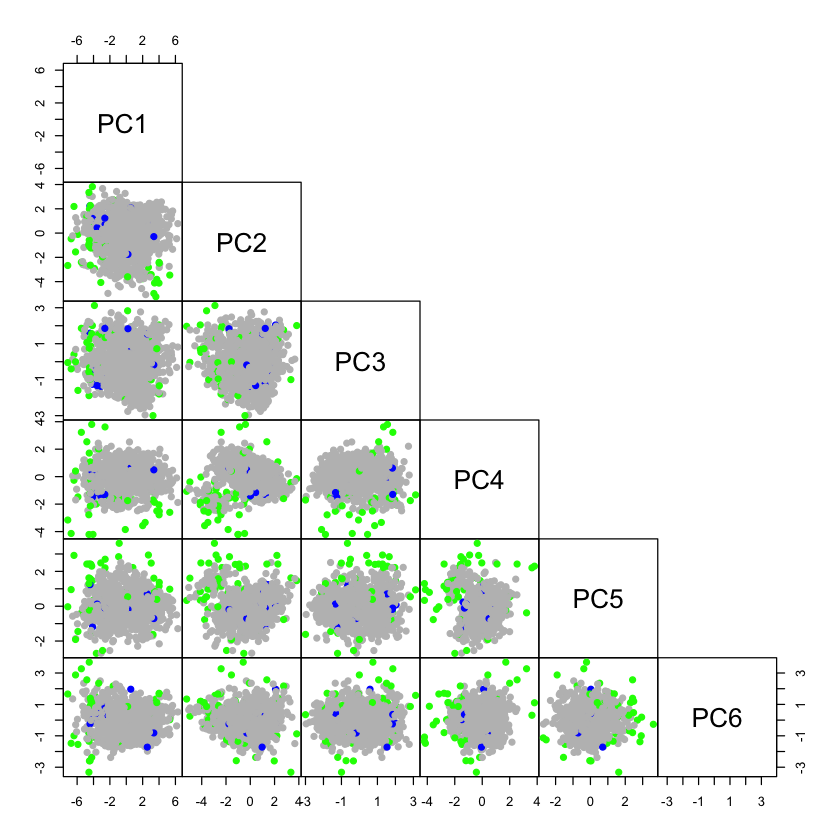

In [19]:
# visualize outliers
colors <- rep('grey', nrow(players.continuous))
colors[c(list_od)] <- c('blue') # orthogonal outliers
colors[c(list_sd)] <- c('green')
colors[c(list_blp)] <- c('red') # bad leverage points
pairs(players.pca.5$scores, pch = 19, col = colors, upper.panel = NULL, gap = 0) 

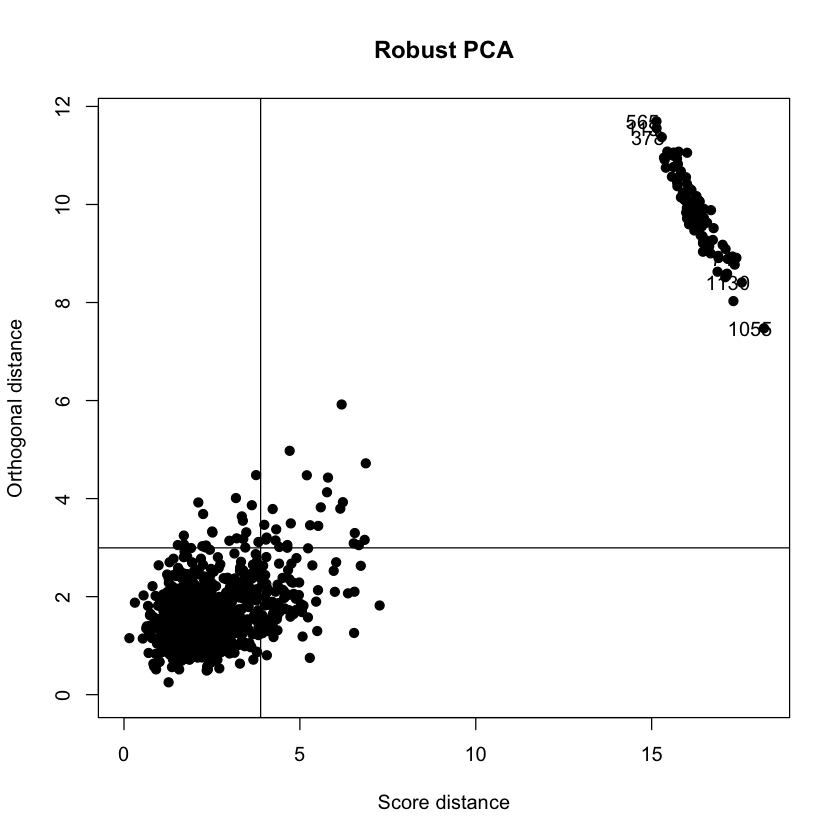

In [20]:
# robust PCA
players.pca.robust <- PcaHubert(players.continuous, scale = mad, k = 5, crit.pca.distances = 0.99)
plot(players.pca.robust, pch = 19)

In [21]:
od <- as.vector(which(players.pca.robust$od > players.pca.robust$cutoff.od))
cat("Orthogonal outliers:", length(od), "\n")
sd <- as.vector(which(players.pca.robust$sd > players.pca.robust$cutoff.sd))
blp <- as.vector(which(players.pca.robust$sd > players.pca.robust$cutoff.sd & players.pca.robust$od > players.pca.robust$cutoff.od))
cat("Bad leverage poins:", length(blp), "\n")
# bad leverage points are detected using robust PCA
# some orthogonal outliers

Orthogonal outliers: 132 
Bad leverage poins: 111 


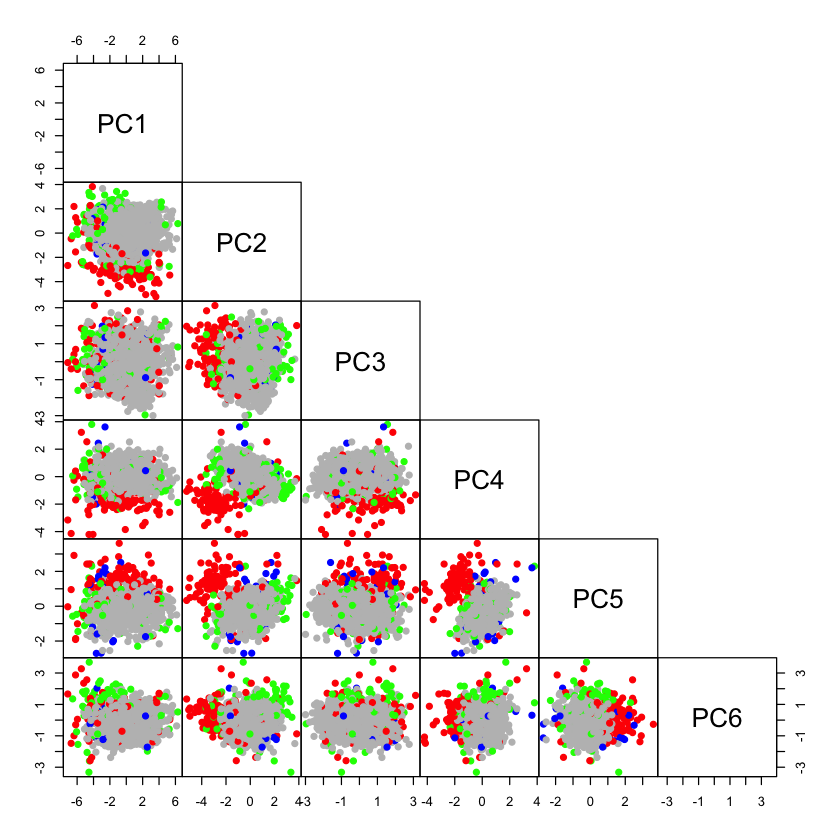

In [22]:
# visualize outliers for robust PCA
colors <- rep('grey', nrow(players.continuous))
colors[c(od)] <- c('blue')
colors[c(sd)] <- c('green')
colors[c(blp)] <- c('red')
pairs(players.pca.5$scores, pch = 19, col = colors, upper.panel = NULL, gap = 0) 

Robust PCA detects bad leverage points (outlying orthogonal distance and outlying score distance, in red) that classical PCA cannot detect. It also detects more orthogonal outliers (blue) than classical PCA.